In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

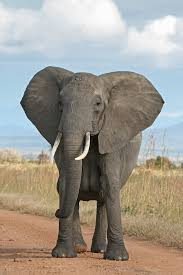

In [5]:
img = Image.open("/content/drive/MyDrive/Projects/images.jpeg")
display(img)

In [6]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [7]:
data = feature_extractor(images=img, return_tensors="pt")

In [8]:
output = model(**data)

In [9]:
logits = output.logits

In [10]:
predict_class_idx = output.logits.argmax(-1).item()
print("predicted image:",model.config.id2label[predict_class_idx])

predicted image: African elephant, Loxodonta africana


In [11]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `real_time_test` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authen

In [12]:
!huggingface-cli download apple/DepthPro --local-dir checkpoints


Fetching 3 files:   0% 0/3 [00:00<?, ?it/s]Downloading '.gitattributes' to 'checkpoints/.cache/huggingface/download/.gitattributes.a6344aac8c09253b3b630fb776ae94478aa0275b.incomplete'

.gitattributes: 100% 1.52k/1.52k [00:00<00:00, 8.84MB/s]
Download complete. Moving file to checkpoints/.gitattributes
Fetching 3 files:  33% 1/3 [00:00<00:01,  1.90it/s]
README.md: 100% 3.66k/3.66k [00:00<00:00, 21.8MB/s]
Download complete. Moving file to checkpoints/README.md

depth_pro.pt:   0% 0.00/1.90G [00:00<?, ?B/s]
depth_pro.pt:   1% 10.5M/1.90G [00:00<00:44, 42.3MB/s]
depth_pro.pt:   1% 21.0M/1.90G [00:00<00:43, 42.9MB/s]
depth_pro.pt:   2% 31.5M/1.90G [00:00<00:43, 43.1MB/s]
depth_pro.pt:   2% 41.9M/1.90G [00:00<00:42, 43.5MB/s]
depth_pro.pt:   3% 52.4M/1.90G [00:01<00:42, 43.2MB/s]
depth_pro.pt:   3% 62.9M/1.90G [00:01<00:42, 43.0MB/s]
depth_pro.pt:   4% 73.4M/1.90G [00:01<00:42, 42.8MB/s]
depth_pro.pt:   4% 83.9M/1.90G [00:01<00:42, 42.7MB/s]
depth_pro.pt:   5% 94.4M/1.90G [00:02<00:42, 42.9M

In [13]:
!ls checkpoints


depth_pro.pt  README.md


In [18]:
!pip install git+https://github.com/apple/ml-depth-pro


  Cloning https://github.com/apple/ml-depth-pro to /tmp/pip-req-build-fbo9vfwx
  Running command git clone --filter=blob:none --quiet https://github.com/apple/ml-depth-pro /tmp/pip-req-build-fbo9vfwx
  Resolved https://github.com/apple/ml-depth-pro to commit b2cd0d51daa95e49277a9f642f7fd736b7f9e91d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.2 MB/s eta 0:00:00
  Created wheel for depth_pro: filename=depth_pro-0.1-py3-none-any.whl size=27530 sha256=95cdcb4bf96ed33f58a3e538f9497fe186e591b3fc51760aae234af93768b2c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-puwt5l_3/wheels/a5/57/e4/4825930186d393481f72cc336750f91fea7cd98d56626cabbc
Successfully built depth_pro


In [19]:
from PIL import Image
import depth_pro


model, transform = depth_pro.create_model_and_transforms()
model.eval()

image, _, f_px = depth_pro.load_rgb("/content/drive/MyDrive/Projects/images.jpeg")
image = transform(image)

prediction = model.infer(image, f_px=f_px)
depth = prediction["depth"]
focallength_px = prediction["focallength_px"]


/usr/local/lib/python3.10/dist-packages/depth_pro/depth_pro.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(config.checkpoint_uri, map_location

In [20]:
print(focallength_px)

tensor(926.2856)


In [23]:
import matplotlib.pyplot as plt

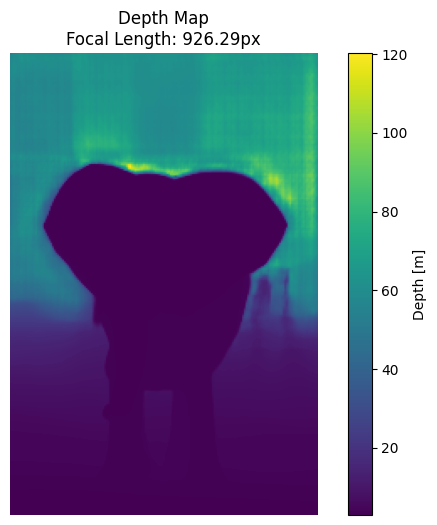

In [25]:
plt.figure(figsize=(8, 6))
plt.imshow(depth, cmap="viridis")
plt.colorbar(label="Depth [m]")
plt.title(f"Depth Map\nFocal Length: {focallength_px:.2f}px")
plt.axis("off")
plt.show()

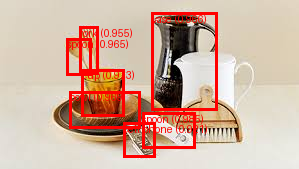

In [36]:
#DETR (End-to-End Object Detection) model with ResNet-50 backbone
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image, ImageDraw, ImageFont
import requests


url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHiKJMJiUMMSePODXKNY76YnCxWsvVAmAqaA&s"
image = Image.open(requests.get(url, stream=True).raw)


processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)


target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]


draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = model.config.id2label[label.item()]
    confidence = round(score.item(), 3)


    draw.rectangle(box, outline="red", width=3)


    text = f"{label_name} ({confidence})"
    draw.text((box[0], box[1]), text, fill="red", font=font)


display(image)


In [37]:
#image segmentation

!pip install -qr https://huggingface.co/briaai/RMBG-1.4/resolve/main/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [41]:
from transformers import pipeline
image_path = "https://farm5.staticflickr.com/4007/4322154488_997e69e4cf_z.jpg"
img = Image.open(requests.get(image_path, stream=True).raw)

pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True)
pillow_image = pipe(image_path)


Device set to use cuda:0


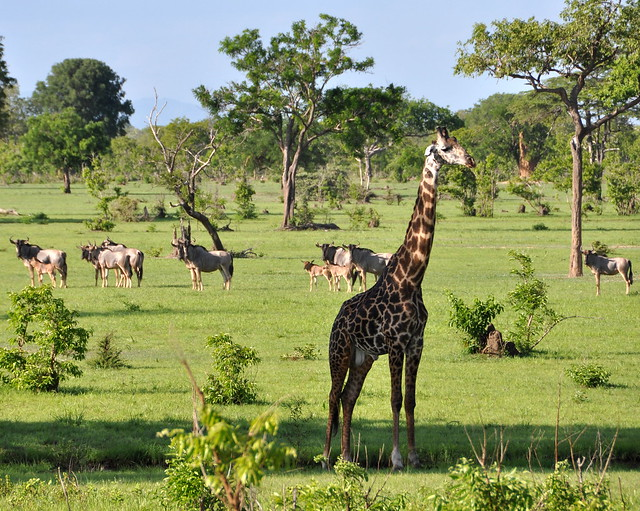

In [42]:
display(img)

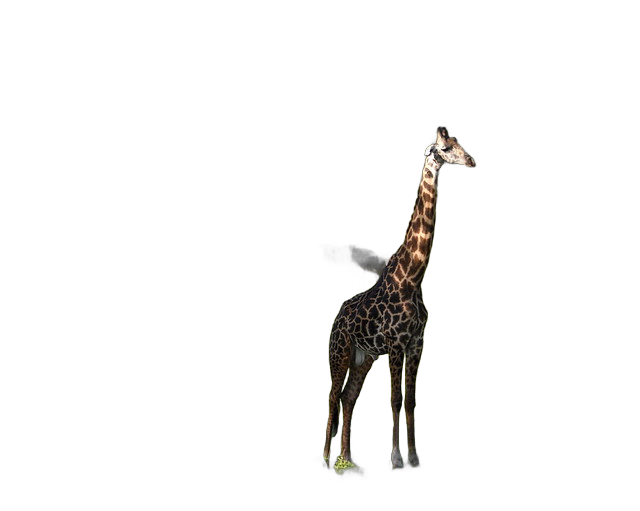

In [39]:
display(pillow_image)

In [44]:
!pip install -U diffusers